<a href="https://colab.research.google.com/github/karimahagstn/latihan_1/blob/main/bigdata_sesi_11_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd

# Unggah file Excel di Colab terlebih dahulu
from google.colab import files
uploaded = files.upload()

# Baca file Excel
df = pd.read_excel('jersy_jude_bellingham.xlsx')

# Tampilkan beberapa baris data
df.head()


Saving jersy_jude_bellingham.xlsx to jersy_jude_bellingham.xlsx


,title,price,sell,addres
0,Jersey Lengan Panjang Real.Madriid Home New Te...,129.00,269 Terjual,Tangerang Selatan
1,JUDE BELLINGHAM FOOTBALL BOXY OVERSIZED/REGULA...,132.80,33 Terjual,Kab. Kediri
2,JERSEY REAL MADRID FANS VERSION FULL PRINTING ...,77.76,895 Terjual,Kab. Wonosobo
3,Bisa COD Baju Bola Dewasa Madrid Club Vini JR ...,20.00,"7,1RB Terjual",NaN
4,Campeones - Tshirt - Football Starboy Jude Bel...,169.00,12 Terjual,Kab. Bandung


In [21]:
# Cek info awal
print(df.info())

# Cek missing value
print(df.isnull().sum())

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   180 non-null    object 
 1   price   180 non-null    float64
 2   sell    171 non-null    object 
 3   addres  156 non-null    object 
dtypes: float64(1), object(3)
memory usage: 5.8+ KB
None
title      0
price      0
sell       9
addres    24
dtype: int64


In [22]:
X = df.drop('addres', axis=1)
y = df['addres']


In [23]:
from sklearn.model_selection import train_test_split
# Import RandomForestRegressor instead of RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
# Import regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Latih model - Use RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42) # Added n_estimators for better performance
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)

# Print regression evaluation metrics instead of classification metrics
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Absolute Error: 1.1161111111111108
Mean Squared Error: 2.0043222222222226
R-squared: 0.937256


Mean Absolute Error: 1.1161111111111108
Mean Squared Error: 2.0043222222222226
R-squared: 0.937256

Some actual values vs predicted values:
Actual: 15, Predicted: 15.00
Actual: 3, Predicted: 4.20
Actual: 13, Predicted: 10.43
Actual: 0, Predicted: 3.00
Actual: 15, Predicted: 14.58
Actual: 3, Predicted: 4.79
Actual: 7, Predicted: 7.67
Actual: 8, Predicted: 8.22
Actual: 14, Predicted: 13.40
Actual: 7, Predicted: 6.71


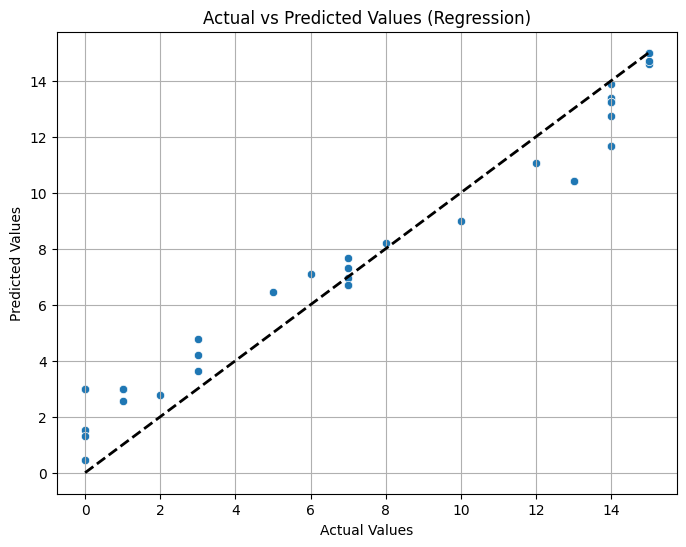

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prediksi hasil pada data uji (sudah dilakukan sebelumnya, tapi diulang untuk kejelasan)
y_pred = model.predict(X_test)

# Tampilkan metrik regresi (opsional, tapi disarankan)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))
print("\nSome actual values vs predicted values:")
for i in range(min(10, len(y_test))):
    print(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]:.2f}")

# Buat scatter plot nilai sebenarnya vs prediksi
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)

# Tambahkan garis diagonal y=x untuk referensi
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Regression)")
plt.grid(True)
plt.show()